# 1)Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is $10,000 and your balance is $3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.





**Credit risk model building** is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the **Probability of Default (PD) model**, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.


#2)Data Exploration, Validation, Cleaning

In [337]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Give me some Credit\cs-training.csv

In [338]:
#file_Path="bank_data.csv"
loans=pd.read_csv("bank_data.csv")

In [339]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [340]:
#What are number of rows and columns
loans.shape

(150000, 12)

In [341]:
#Are there any suspicious variables?
loans.columns.values

array(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [342]:
#Display the variable formats
loans.dtypes

Sr_No                                     int64
SeriousDlqin2yrs                          int64
monthly_utilization                     float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [343]:
#Print the first 10 observations
loans.head(10)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [344]:
#Do we have any unique identifier?
loans.columns.values

array(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

## Categorical variables exploration

In [345]:
#What are the categorical and discrete variables? What are the continues variables.
loans.dtypes
loans.head()


,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [346]:
print(loans['SeriousDlqin2yrs'].value_counts())
#seriously deliquient -> bad customers
#not seriously deliquient -> good customers

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64


In [347]:
print(loans['age'].value_counts())
# look at the percentiles to get a better idea

age
49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64


In [348]:
print(loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())
#paid after 1 month or 30 days after

#96 and 98 are outliers we need to clean the data in -NumberOfTime30-59DaysPastDueNotWorse

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64


In [349]:
print(loans['NumberOfOpenCreditLinesAndLoans'].value_counts())

NumberOfOpenCreditLinesAndLoans
6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
43        8
42        8
45        8
37        7
48        6
54        4
49        4
41        4
46        3
52        3
47        2
51        2
57        2
56        2
44        2
50        2
58        1
53        1
Name: count, dtype: int64


In [350]:
#outliers present in NumberofCredit Lines and Loans - Above 20 Outliers(having more than 20 creditlines and loans)
#regulator =Business: they decide what above is outlier as data analyst you dont decide
#this variable neads cleaning

In [351]:
print(loans['NumberOfTimes90DaysLate'].value_counts())

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64


In [352]:
#NumberOfTimes90DaysLate-has errors
#24 months -24 bills -max to max 24 times
#96 and 98 are Errors -This need to be cleaned

In [353]:
print(loans['NumberRealEstateLoansOrLines'].value_counts())

NumberRealEstateLoansOrLines
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
17        4
16        4
25        3
23        2
20        2
19        2
18        2
26        1
21        1
54        1
29        1
32        1
Name: count, dtype: int64


In [354]:
# more than 10 loans are considered as outliers -After discussing with the business Partner

In [355]:
print(loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts())

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64


In [356]:
#wrong values -96 and 98

In [357]:
print(loans['NumberOfDependents'].value_counts())

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64


In [358]:
# 3924 values are null

In [359]:
#Are there any   variables with missing values?
loans.isnull().sum()

Sr_No                                       0
SeriousDlqin2yrs                            0
monthly_utilization                         0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Continuous variables exploration

In [360]:
# we explore the continuous variables using the percentiles concept and funtion is quantile

### RevolvingUtilizationOfUnsecuredLines

{'whiskers': [<matplotlib.lines.Line2D at 0x202ae4d5e70>,
 'caps': [<matplotlib.lines.Line2D at 0x202ae4d64a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202ae4d5b70>],
 'medians': [<matplotlib.lines.Line2D at 0x202ae4d6aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202ae4d6da0>],
 'means': []}

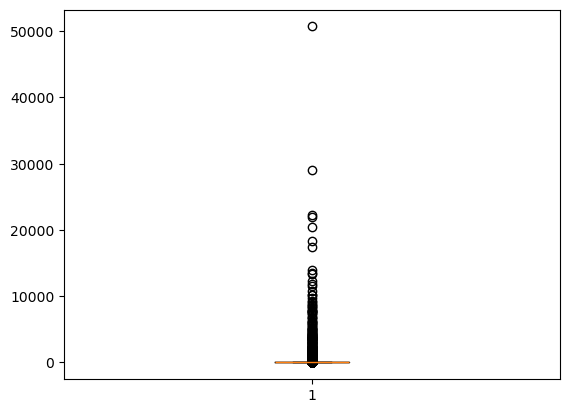

In [361]:
plt.boxplot(loans["monthly_utilization"])

In [362]:
util_percentiles=loans['monthly_utilization'].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.000        0.00
0.100        0.00
0.200        0.02
0.300        0.04
0.400        0.08
0.500        0.15
0.750        0.56
0.800        0.70
0.900        0.98
0.910        1.00
0.950        1.00
0.960        1.00
0.970        1.00
0.975        1.00
0.980        1.01
0.990        1.09
1.000    50708.00
Name: monthly_utilization, dtype: float64

In [363]:
# 3% issues and 97% is clean
#Explanation
'''Lower Percentiles (Up to 97th):
The data shows a gradual increase in utilization as you move up the percentiles.
Up to the 97th percentile, the utilization remains relatively reasonable, with values ranging from 0.00 to 1.00. This suggests that the majority (97%) of your loan data has credit utilization within expected ranges.
Why "Clean": These values are within a typical range for credit utilization. A utilization of 1.00 (100%) is considered high but not necessarily an error, as some borrowers may max out their credit.

Top 3% (97th to 100th Percentile):
Significant Jump: There's a dramatic jump in utilization from 1.00 at the 97th percentile to 50708.00 at the 100th percentile.
Outlier: The value of 50708.00 is extremely high and indicates a data error or a highly unusual situation.
Why "Issues": Such a high utilization is not realistic. It's likely a data entry error, a system glitch, or some other anomaly.
In credit risk modeling, it's crucial to handle such outliers as they can skew your results and lead to inaccurate predictions.'''

'Lower Percentiles (Up to 97th):\nThe data shows a gradual increase in utilization as you move up the percentiles.\nUp to the 97th percentile, the utilization remains relatively reasonable, with values ranging from 0.00 to 1.00. This suggests that the majority (97%) of your loan data has credit utilization within expected ranges.\nWhy "Clean": These values are within a typical range for credit utilization. A utilization of 1.00 (100%) is considered high but not necessarily an error, as some borrowers may max out their credit.\n\nTop 3% (97th to 100th Percentile):\nSignificant Jump: There\'s a dramatic jump in utilization from 1.00 at the 97th percentile to 50708.00 at the 100th percentile.\nOutlier: The value of 50708.00 is extremely high and indicates a data error or a highly unusual situation.\nWhy "Issues": Such a high utilization is not realistic. It\'s likely a data entry error, a system glitch, or some other anomaly.\nIn credit risk modeling, it\'s crucial to handle such outliers

### MonthlyIncome

{'whiskers': [<matplotlib.lines.Line2D at 0x202ae53ec80>,
 'caps': [<matplotlib.lines.Line2D at 0x202ae53f280>,
 'boxes': [<matplotlib.lines.Line2D at 0x202ae53e980>],
 'medians': [<matplotlib.lines.Line2D at 0x202ae53f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x202ae4d4b50>],
 'means': []}

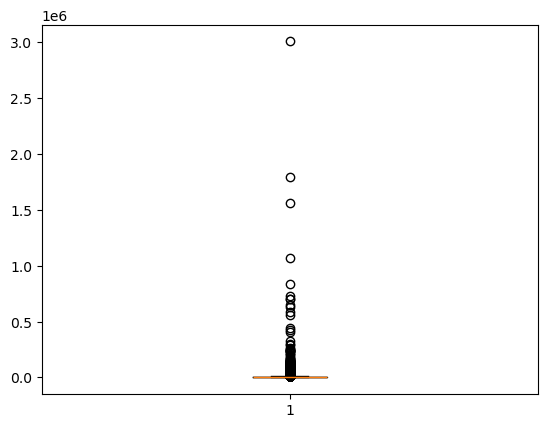

In [364]:
#loans.boxplot(column="MonthlyIncome")
non_null_monthly_income=loans["MonthlyIncome"][loans["MonthlyIncome"].isnull()==False]
plt.boxplot(non_null_monthly_income)

In [365]:
#Find the percentage of missing values
print("Count of missing values")
print(loans['MonthlyIncome'].isnull().sum())
print("% of missing values")
print(round(loans['MonthlyIncome'].isnull().sum()/len(loans),2))

Count of missing values
29731
% of missing values
0.2


In [366]:
#monthly income has 2 problems missing values and outliers

## Data Cleaning

### Data Cleaning - Monthly_utilization

In [367]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [368]:
#97% clean and 3% issues
#Replace with the median - means  imputation

In [369]:
util_percentiles=loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.050        0.00
0.100        0.00
0.250        0.03
0.500        0.15
0.750        0.56
0.800        0.70
0.900        0.98
0.910        1.00
0.950        1.00
0.960        1.00
0.970        1.00
0.975        1.00
0.980        1.01
0.990        1.09
1.000    50708.00
Name: monthly_utilization, dtype: float64

In [370]:
median_util=loans['monthly_utilization'].median()
median_util

np.float64(0.154180737)

In [371]:
util_temp_bool_vect=loans['monthly_utilization']>1

loans['util_new']=loans['monthly_utilization']
loans['util_new'][util_temp_bool_vect]=median_util

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\953468620.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['util_new'][util_temp_bool_vect]=median_util
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\953468620.py:4: SettingWithC

In [372]:
# percentile distribution for new variable
util_percentiles1=loans['util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)


0.050    0.00
0.100    0.00
0.250    0.03
0.500    0.15
0.750    0.51
0.800    0.63
0.900    0.93
0.910    0.95
0.950    1.00
0.960    1.00
0.970    1.00
0.975    1.00
0.980    1.00
0.990    1.00
1.000    1.00
Name: util_new, dtype: float64

### Data Cleaning - NumberOfTime30-59DaysPastDueNotWorse

In [373]:
# cleaning of NumberOfTime30-59DaysPastDueNotWorse-one month late freq
#96 and 98 are errors

In [374]:
freq_table_30dpd=loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
freq_table_30dpd

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [375]:
#Clean the variable- Look at the cross tab of variable vs target. Impute based on target .
#Cross tab with target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


In [376]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


In [377]:

#Percentage of 0 and 1 are of 98 is near to percentages of 6.
#Replacing error values with 6

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6
loans['num_30_59_dpd_new']

loans['num_30_59_dpd_new'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3992811056.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3992811056.py:5: S

num_30_59_dpd_new
0     126018
1      16033
2       4598
3       1754
4        747
6        409
5        342
7         54
8         25
9         12
10         4
12         2
13         1
11         1
Name: count, dtype: int64

### Data Cleaning Monthly Income

In [378]:
'''
Monthly Income
20% missing values
80% clean
'''
#creating a Flag variable
#imputation with median

'\nMonthly Income\n20% missing values\n80% clean\n'

In [379]:
#Find the missing value percentage in monthly income
loans['MonthlyIncome'].isnull().sum()
loans['MonthlyIncome'].isnull().sum()/len(loans)
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:

np.float64(0.19820666666666667)

In [380]:
#Flag variable
loans['MonthlyIncome_ind']=1
loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=0
loans['MonthlyIncome_ind'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3341879715.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=0
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3341879715.py:3:

MonthlyIncome_ind
1    120269
0     29731
Name: count, dtype: int64

In [381]:
#Imputation with median
loans['MonthlyIncome_new']=loans['MonthlyIncome']
loans['MonthlyIncome_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
round(loans['MonthlyIncome_new'].describe())

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3855414345.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['MonthlyIncome_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
C:\Users\Admin\AppData\Local\Temp\ip

count     150000.0
mean        6418.0
std        12890.0
min            0.0
25%         3903.0
50%         5400.0
75%         7400.0
max      3008750.0
Name: MonthlyIncome_new, dtype: float64

In [382]:
loans["MonthlyIncome_new"].isnull().sum()

np.int64(0)

#Data Cleaning - All the other Variables

In [383]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'util_new', 'num_30_59_dpd_new',
       'MonthlyIncome_ind', 'MonthlyIncome_new'],
      dtype='object')

### Age

In [384]:
#max age is 80 
#1% outliers- low side
#3% outliers - High side

# different Techinques to handle age outliers
#Replace lowside outliers with - min value -21
#anybody below 21 will be replaced with 21 -flooring
# max allowed age is 80
# anybody above 80 will be replaced with the -capping

In [385]:
loans["age"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00      0.0
0.01     24.0
0.10     33.0
0.20     39.0
0.30     44.0
0.40     48.0
0.50     52.0
0.60     56.0
0.70     61.0
0.80     65.0
0.90     72.0
0.93     75.0
0.94     76.0
0.95     78.0
0.96     79.0
0.97     81.0
0.98     84.0
0.99     87.0
1.00    109.0
Name: age, dtype: float64

In [386]:
loans["age_new"]=loans["age"]
loans["age_new"][loans["age_new"]>90]=loans["age"].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2899766376.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["age_new"][loans["age_new"]>90]=loans["age"].median()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2899766376.py:2: S

In [387]:
loans["age_new"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00     0.0
0.01    24.0
0.10    33.0
0.20    39.0
0.30    44.0
0.40    48.0
0.50    52.0
0.60    56.0
0.70    60.0
0.80    65.0
0.90    72.0
0.93    75.0
0.94    76.0
0.95    77.0
0.96    79.0
0.97    80.0
0.98    83.0
0.99    86.0
1.00    90.0
Name: age_new, dtype: float64

In [388]:
# this is alternative method to median is flooring and capping
'''
#flooring
loans["age_new"]=loans["age"]
loans["age_new"][loans["age_new"]<21]=21

#capping
loans["age_new"][loans["age_new"]>80]=80

loans["age_new"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
'''

'\n#flooring\nloans["age_new"]=loans["age"]\nloans["age_new"][loans["age_new"]<21]=21\n\n#capping\nloans["age_new"][loans["age_new"]>80]=80\n\nloans["age_new"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])\n'

### DebtRatio

In [389]:
#5000/10000-50%
#if beyond 1 that is the outliers range should be {0-1}

In [390]:
loans["DebtRatio"].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.76,0.77,0.78,0.8,0.81,0.82,0.83,0.86,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00         0.000000
0.01         0.000000
0.02         0.000000
0.03         0.000480
0.04         0.002278
0.05         0.004329
0.06         0.006799
0.07         0.009997
0.08         0.014780
0.09         0.021249
0.10         0.030874
0.20         0.133773
0.30         0.213697
0.40         0.287460
0.50         0.366508
0.60         0.467506
0.70         0.649189
0.75         0.868254
0.76         0.951184
0.77         1.058832
0.78         1.275069
0.80         4.000000
0.81        14.000000
0.82        31.000000
0.83        61.000000
0.86       453.000000
0.90      1267.000000
0.93      1917.070000
0.94      2172.060000
0.95      2449.000000
0.96      2791.000000
0.97      3225.000000
0.98      3839.000000
0.99      4979.040000
1.00    329664.000000
Name: DebtRatio, dtype: float64

In [391]:
loans["DebtRatio"].isnull().sum()

np.int64(0)

In [392]:
#24% outliers
#No missing values

#flag variable
loans["DebtRatio_ind"]=1
loans["DebtRatio_ind"][loans["DebtRatio"]>1.5]=0
loans["DebtRatio_ind"].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3708964234.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["DebtRatio_ind"][loans["DebtRatio"]>1.5]=0
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3708964234.py:6: SettingWithC

DebtRatio_ind
1    117927
0     32073
Name: count, dtype: int64

In [393]:
#  imputation
loans["DebtRatio_new"]=loans["DebtRatio"]
loans["DebtRatio_new"][loans["DebtRatio_new"]>1.5]=loans["DebtRatio"].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2020513952.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["DebtRatio_new"][loans["DebtRatio_new"]>1.5]=loans["DebtRatio"].median()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492

In [394]:
loans["DebtRatio_new"].describe()

count    150000.000000
mean          0.334851
std           0.236165
min           0.000000
25%           0.175074
50%           0.366506
75%           0.398985
max           1.500000
Name: DebtRatio_new, dtype: float64

### NumberOfOpenCreditLinesAndLoans

In [395]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts(sort=False)

NumberOfOpenCreditLinesAndLoans
13     5667
4     11609
2      6666
5     12931
7     13245
3      9058
8     12562
9     11355
6     13614
10     9624
14     4546
22      685
17     2370
1      4438
15     3645
31       74
12     7005
21      864
11     8321
19     1433
18     1874
26      239
20     1169
23      533
0      1888
16     3000
27      194
29      114
28      150
24      422
25      337
32       52
46        3
33       47
30       88
34       35
37        7
38       13
36       18
35       27
54        4
43        8
45        8
49        4
57        2
48        6
40       10
58        1
51        2
52        3
39        9
41        4
56        2
42        8
47        2
50        2
44        2
53        1
Name: count, dtype: int64

In [396]:
loans["NumberOfOpenCreditLinesAndLoans"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000     0.0
0.100     3.0
0.200     4.0
0.300     5.0
0.400     6.0
0.500     8.0
0.750    11.0
0.800    12.0
0.900    15.0
0.910    16.0
0.950    18.0
0.960    19.0
0.970    20.0
0.975    21.0
0.980    22.0
0.990    24.0
1.000    58.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [397]:
#above 20 considered as outliers
#3% High side outliers
#No Missing values

In [398]:
loans["Open_Credit_lines_new"]=loans["NumberOfOpenCreditLinesAndLoans"]
loans["Open_Credit_lines_new"][loans["Open_Credit_lines_new"]>20]=loans["NumberOfOpenCreditLinesAndLoans"].median()
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\1799985280.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["Open_Credit_lines_new"][loans["Open_Credit_lines_new"]>20]=loans["NumberOfOpenCreditLinesAndLoans"].median()
C:\Users\Adm

In [399]:
loans["Open_Credit_lines_new"].describe()

count    150000.000000
mean          8.009433
std           4.326973
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          20.000000
Name: Open_Credit_lines_new, dtype: float64

## NumberOfTimes90DaysLate

In [400]:
cross_tab_90dpd_target=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
cross_tab_90dpd_target

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


In [401]:
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [402]:
loans['num_90_dpd_new']=loans['NumberOfTimes90DaysLate']
loans['num_90_dpd_new'][loans['num_90_dpd_new']>12]=3
loans['num_90_dpd_new']

loans['num_90_dpd_new'].value_counts(sort=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2969497538.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['num_90_dpd_new'][loans['num_90_dpd_new']>12]=3
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2969497538.py:2: Setting

num_90_dpd_new
0     141662
1       5243
3        945
2       1555
5        131
4        291
10         8
9         19
6         80
7         38
8         21
11         5
12         2
Name: count, dtype: int64

### NumberRealEstateLoansOrLines

In [403]:
#number of Home loans max is 4 anything above is considered as outliers

In [404]:
loans["NumberRealEstateLoansOrLines"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000     0.0
0.100     0.0
0.200     0.0
0.300     0.0
0.400     1.0
0.500     1.0
0.750     2.0
0.800     2.0
0.900     2.0
0.910     2.0
0.950     3.0
0.960     3.0
0.970     3.0
0.975     3.0
0.980     4.0
0.990     4.0
1.000    54.0
Name: NumberRealEstateLoansOrLines, dtype: float64

In [405]:
loans["Real_estate_loans_new"]=loans["NumberRealEstateLoansOrLines"]
loans["Real_estate_loans_new"][loans["Real_estate_loans_new"]>4]=loans["NumberRealEstateLoansOrLines"].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\1596208677.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["Real_estate_loans_new"][loans["Real_estate_loans_new"]>4]=loans["NumberRealEstateLoansOrLines"].median()
C:\Users\Admin\A

## NumberOfTime60-89DaysPastDueNotWorse

In [406]:
loans['num_60_dpd_new']=loans['NumberOfTime60-89DaysPastDueNotWorse']
loans['num_60_dpd_new'][loans['num_60_dpd_new']>12]=3
loans['num_60_dpd_new']

loans['num_60_dpd_new'].value_counts(sort=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3418275715.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['num_60_dpd_new'][loans['num_60_dpd_new']>12]=3
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3418275715.py:2: Setting

num_60_dpd_new
0     142396
1       5731
2       1118
5         34
3        587
4        105
6         16
7          9
8          2
11         1
9          1
Name: count, dtype: int64

## NumberOfDependents

In [407]:
loans["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [408]:
loans["NumberOfDependents"].isnull().sum()

np.int64(3924)

In [409]:
loans["NumberOfDependents_new"]=loans["NumberOfDependents"]
loans["NumberOfDependents_new"][(loans["NumberOfDependents_new"]>10)|
                                (loans["NumberOfDependents"].isnull())]=loans["NumberOfDependents"].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\2713329696.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["NumberOfDependents_new"][(loans["NumberOfDependents_new"]>10)|
C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\27133296

In [410]:
loans["NumberOfDependents_new"].isnull().sum()

np.int64(0)

In [411]:
loans["NumberOfDependents_new"].value_counts()

NumberOfDependents_new
0.0     90828
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
Name: count, dtype: int64

## Exporting the final dataset

In [412]:
loans.to_csv("loans_cleaned.csv")

## Importing Already Cleaned Dataset

In [413]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,MonthlyIncome_ind,MonthlyIncome_new,age_new,DebtRatio_ind,DebtRatio_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,...,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,...,0.801793,6.418455e+03,52.161007,0.786180,0.334851,8.009433,0.095007,0.962960,0.070087,0.737193
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,...,0.398650,1.289040e+04,14.584992,0.410003,0.236165,4.326973,0.488967,0.938918,0.352385,1.105454
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,...,1.000000,3.903000e+03,41.000000,1.000000,0.175074,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,...,1.000000,5.400000e+03,52.000000,1.000000,0.366506,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,...,1.000000,7.400000e+03,62.000000,1.000000,0.398985,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,...,1.000000,3.008750e+06,90.000000,1.000000,1.500000,20.000000,12.000000,4.000000,11.000000,10.000000


# 3)Logistic Regression Model Building

In [414]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split

X=loans.drop(["SeriousDlqin2yrs","Sr_No"],axis=1)
y=loans["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [415]:
# Fill missing values with the median of each column
X_train = X_train.fillna(X_train.median())

# Replace infinite values with a large finite number
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.median())

# Remove features with zero variance
X_train = X_train.loc[:, (X_train != X_train.iloc[0]).any()]

# Remove highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train = X_train.drop(columns=to_drop)

model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.199620
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119983
Method:                           MLE   Df Model:                           16
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.1937
Time:                        17:37:15   Log-Likelihood:                -23954.
converged:                       True   LL-Null:                       -29710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
monthly_utilization                  -1.471e-05   8.18e-

In [416]:
#Accuracy
pred_train=model.predict(X_train)

# Ensure the same columns are dropped from X_test as were dropped from X_train
to_drop = [col for col in to_drop if col in X_test.columns]
X_test = X_test.drop(columns=to_drop)
X_test = X_test.loc[:, X_train.columns]  # Ensure the columns are in the same order

# Handle missing values in X_test
X_test = X_test.fillna(X_test.median())

pred_test=model.predict(X_test)

#Confuson matrix and Accuracy on train data
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_train,np.round(pred_train))
acc=accuracy_score(y_train,np.round(pred_train))
print("Train Accuracy", acc)

#Confuson matrix and Accuracy on test data
confusion_matrix(y_test,np.round(pred_test))
acc=accuracy_score(y_test,np.round(pred_test))
print("Test Accuracy", acc)

Train Accuracy 0.9350166666666667
Test Accuracy 0.9392333333333334


#Multicollinearity Checking

In [417]:
#Vif Function
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [418]:
vif_cal(loans.drop(["Sr_No"],axis=1),"SeriousDlqin2yrs")

monthly_utilization  VIF =  1.0
age  VIF =  58.7
NumberOfTime30-59DaysPastDueNotWorse  VIF =  94752753.96
DebtRatio  VIF =  1.12


C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\1729958118.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


MonthlyIncome  VIF =  inf
NumberOfOpenCreditLinesAndLoans  VIF =  3.34
NumberOfTimes90DaysLate  VIF =  1286.73
NumberRealEstateLoansOrLines  VIF =  3.34
NumberOfTime60-89DaysPastDueNotWorse  VIF =  86272944.46
NumberOfDependents  VIF =  278.82
util_new  VIF =  1.2
num_30_59_dpd_new  VIF =  4309419.47


c:\Users\Admin\miniconda3\envs\travelplannar\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


MonthlyIncome_ind  VIF =  0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\1729958118.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


MonthlyIncome_new  VIF =  inf
age_new  VIF =  58.71
DebtRatio_ind  VIF =  1.13
DebtRatio_new  VIF =  1.52
Open_Credit_lines_new  VIF =  3.3
num_90_dpd_new  VIF =  26.99
Real_estate_loans_new  VIF =  3.41
num_60_dpd_new  VIF =  897753.82
NumberOfDependents_new  VIF =  278.86


#Final Model

In [419]:
#Drop DebtRatio_new based on the P-Value (individual feature impact on y(target varaiable))

X=loans.drop(["SeriousDlqin2yrs","Sr_No","DebtRatio_new"],axis=1)
y=loans["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Fill missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Replace infinite values with a large finite number
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Remove highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

import statsmodels.api as sm
model=sm.Logit(y_train,X_train).fit()
print(model.summary())

tran_pred=model.predict(X_train)
test_pred=model.predict(X_test)

train_accuracy=accuracy_score(y_train,np.round(tran_pred))
test_accuracy=accuracy_score(y_test,np.round(test_pred))

print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)


Optimization terminated successfully.
         Current function value: 0.199627
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119984
Method:                           MLE   Df Model:                           15
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.1937
Time:                        17:37:25   Log-Likelihood:                -23955.
converged:                       True   LL-Null:                       -29710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
monthly_utilization                  -1.659e-05   8.21e-

# 4)Model Validation & Class Imbalance

In [420]:
#Classwise Accuracy
loans["SeriousDlqin2yrs"].value_counts()/len(loans)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: count, dtype: float64

In [421]:
train_cm=confusion_matrix(y_train,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


Train Confusion Matrix
 [[110815   1064]
 [  6729   1392]]
Test Confusion Matrix
 [[27844   251]
 [ 1573   332]]


In [422]:
#overall acc--> not very important
#Class-0 good
#Class-1 Accuracy (bad) --> very important
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

Class-0 Accuracy 0.990489725507021
Class-1 Accuracy 0.17140746213520502


#Handling Class Imablance using SMOTE technique

In [423]:

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.6, random_state=44)

X_train_smote, y_train_smote=smote.fit_resample(X_train,y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

Before SMOTE Counter({0: 111879, 1: 8121})
After SMOTE Counter({0: 111879, 1: 67127})


##Model with balanced data - SMOTE

In [424]:
model=sm.Logit(y_train_smote,X_train_smote).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.508207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               179006
Model:                          Logit   Df Residuals:                   178990
Method:                           MLE   Df Model:                           15
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.2318
Time:                        17:37:27   Log-Likelihood:                -90972.
converged:                       True   LL-Null:                   -1.1842e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
monthly_utilization                  -3.853e-05   3.97e-

In [425]:
#Confusion matrix and Accuracy
tran_pred=model.predict(X_train_smote)
test_pred=model.predict(X_test)

#confusion matrix
train_cm=confusion_matrix(y_train_smote,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


Train Confusion Matrix
 [[95788 16091]
 [28341 38786]]
Test Confusion Matrix
 [[24025  4070]
 [  711  1194]]


In [426]:
#Class-0 and Class-1 Accuracy
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

Class-0 Accuracy 0.8561749747495062
Class-1 Accuracy 0.5778002890044245


In [427]:
#Class-0 and Class-1 Accuracy on test data
class_0_acc=test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
class_1_acc=test_cm[1,1]/(test_cm[1,0]+test_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

Class-0 Accuracy 0.8551343655454707
Class-1 Accuracy 0.6267716535433071
